**Regresion logistica**

In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression # Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Cargar el dataset en CSV

Datos = pd.read_csv('./Titanic-Dataset2.csv')

In [3]:
# lectura de los Datos para el análisis exploratorio

Datos.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G6,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,G6,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,G6,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,G6,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,G6,C


In [4]:
# la dimencio de los datos 
Datos.shape

(891, 12)

In [5]:
# Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificasion de Edad')

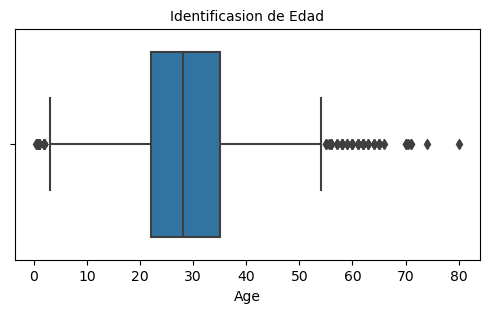

In [6]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificasion de Edad', fontsize=10 )

In [7]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [8]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

supervivientes  1 = Sobrevivio 0 = NoSobrevivio

In [9]:
# Total de personas con Glucometria en ayunas

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [11]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop(['Survived','Name','Sex','Ticket','Cabin' ,'Embarked'],axis=1) # Se cargan los datos de train sin los datos de la columna Survived
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna Survived

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [12]:
print (X_train)

     PassengerId  Pclass   Age  SibSp  Parch     Fare
671          672       1  31.0      1      0  52.0000
417          418       2  18.0      0      2  13.0000
634          635       3   9.0      3      2  27.9000
323          324       2  22.0      1      1  29.0000
379          380       3  19.0      0      0   7.7750
..           ...     ...   ...    ...    ...      ...
131          132       3  20.0      0      0   7.0500
490          491       3  28.0      1      0  19.9667
528          529       3  39.0      0      0   7.9250
48            49       3  28.0      2      0  21.6792
80            81       3  22.0      0      0   9.0000

[668 rows x 6 columns]


In [13]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


Entrenar el modelo configurando los diferentes hiperparámetros

In [14]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict 


In [15]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [16]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       137
           1       0.63      0.38      0.48        86

    accuracy                           0.68       223
   macro avg       0.66      0.62      0.62       223
weighted avg       0.67      0.68      0.66       223



Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

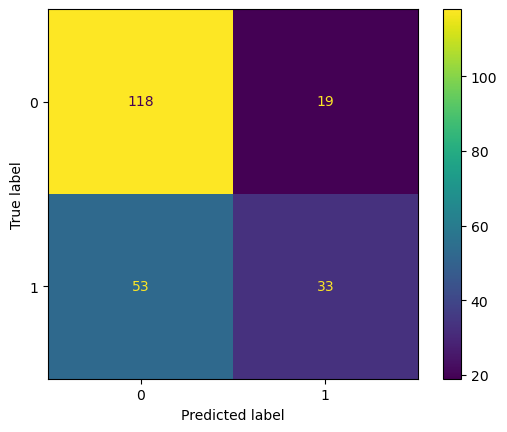

In [17]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

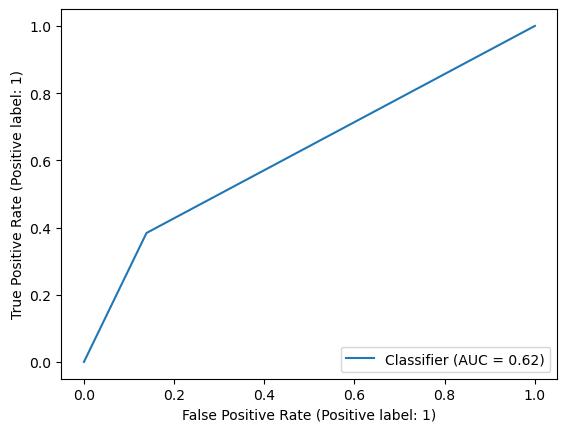

In [18]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

Interpretar, analizar y documentar los resultados obtenidos

Precisión: la presicion de supervivientes  en el Naufragio del tinatic vemos que tenemos un 0.63 que sobrevivieron al naufraguio y un 0.69 que no sobrevivieron.

Recall:    vemosque tenemos un 0.38 de posibles que arrojo el sistema  

F1 Score: Es la media armónica de precisión y recuperación nos dio 0.48 que esta un poco bajo entre el recall..

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: la clasificador predijo correctamente como falso 118

Verdaderos positivos: la clasificador predijo correctamente como Verdadero 33

Falsos positivos: la clasificador predijo incorrectamente como Verdaderas 53

Falsos negativos:la clasificador predijo incorrectamente como falso 19

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,62 lo que significa que el 62 % de las predicciones.